## Pandas

##### Basics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#DataFrame with row and column, single column as Series
df=pd.DataFrame(
    {
        "Name":['Jack','Tony','Steve'],
        "Age":[22,36,45],
        "Sex":['male','male','male']
    })
df
df['Age']
ages=pd.Series([22,23,24],name="Age")
ages
ages.max()
ages.mean()
df.describe() #describe() method : quick overview of numerical data

,Age
count,3.000000
mean,34.333333
std,11.590226
min,22.000000
25%,29.000000
50%,36.000000
75%,40.500000
max,45.000000


In [3]:
manhat=pd.read_csv('manhattan.csv')
manhat.head(3) #first three rows
manhat.dtypes  #integers (int64) floats (float64) strings (object)
#to excel  #read_* functions and to_ methods
manhat.to_excel('manhattan.xlsx',sheet_name='house',index=False)
#index-> row index labels are not saved 
manhat=pd.read_excel('manhattan.xlsx',sheet_name='house')
#Technical summary
manhat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 0 to 3538
Data columns (total 18 columns):
rental_id           3539 non-null int64
rent                3539 non-null int64
bedrooms            3539 non-null float64
bathrooms           3539 non-null int64
size_sqft           3539 non-null int64
min_to_subway       3539 non-null int64
floor               3539 non-null float64
building_age_yrs    3539 non-null int64
no_fee              3539 non-null int64
has_roofdeck        3539 non-null int64
has_washer_dryer    3539 non-null int64
has_doorman         3539 non-null int64
has_elevator        3539 non-null int64
has_dishwasher      3539 non-null int64
has_patio           3539 non-null int64
has_gym             3539 non-null int64
neighborhood        3539 non-null object
borough             3539 non-null object
dtypes: float64(2), int64(14), object(2)
memory usage: 497.8+ KB


In [4]:
rent=manhat['rent']
rent.head()
type(rent) #pandas.core.series.Series
manhat['rent'].shape # (3539,)
rent_and_sqft=manhat[['rent','size_sqft']]
rent_and_sqft.head()
type(rent_and_sqft) #pandas.core.frame.DataFrame
manhat[['rent','floor']].shape #(3539, 2)

(3539, 2)

In [5]:
#Filtering rows
above_6000=manhat[manhat['rent']>6000]
above_6000.head()
manhat['rent']>6000
above_6000.shape #(858, 18)
green_soho=manhat[manhat['neighborhood'].isin(['Greenwich Village','Soho'])]
green_soho.head()
#only known values
rent_no_na=manhat[manhat['rent'].notna()]
rent_no_na.head()

#Filtering rows and columns
exp_name=manhat.loc[manhat['rent']>6000,'neighborhood'] #[row condition,selected column]
exp_name.head()
exp_name.value_counts() #count per category

manhat.columns.get_loc('neighborhood')
manhat.iloc[0:10,16]='Not known'

##### Plots on pandas

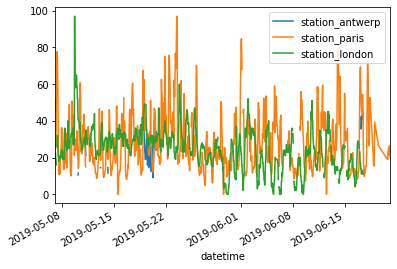

In [6]:
#.plot.* methods are applicable on both Series and DataFrames
#Any plot created by pandas is a Matplotlib object
air=pd.read_csv('air_quality_no2.csv',index_col=0,parse_dates=True)
#first column as index / dates in the index column to Timestamp
air.head()
air.plot()

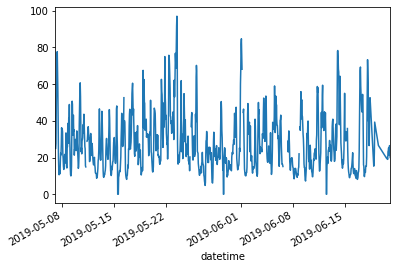

In [7]:
air['station_paris'].plot()

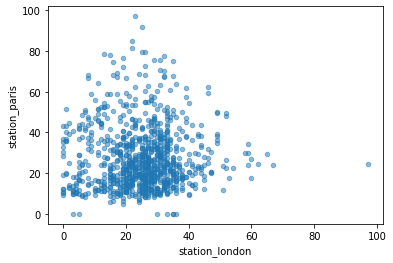

In [8]:
air.plot.scatter(x='station_london',y='station_paris',alpha=0.5)

In [9]:
[method_name for method_name in dir(air.plot) if not method_name.startswith('_')]

['area',
 'bar',
 'barh',
 'box',
 'density',
 'hexbin',
 'hist',
 'kde',
 'line',
 'pie',
 'scatter']

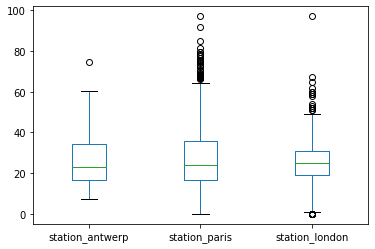

In [10]:
air.plot.box()

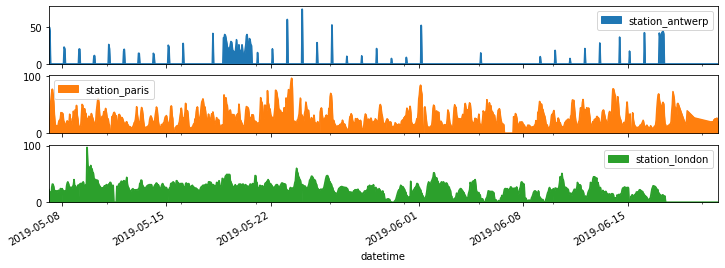

In [11]:
axs=air.plot.area(figsize=(12,4),subplots=True)

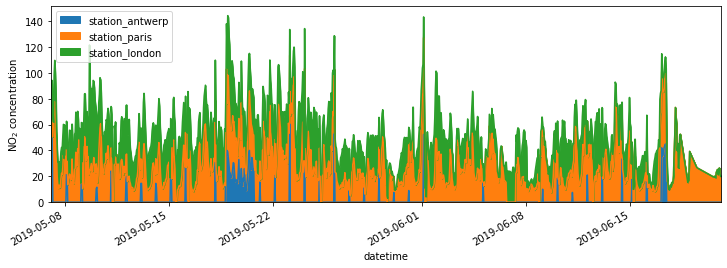

In [12]:
#Create an empty matplotlib figure and axes
fig,axs=plt.subplots(figsize=(12,4))
#use pandas to put the area plot on the prepared figure/axes
air.plot.area(ax=axs)
#Do any matplotlib customization
axs.set_ylabel('NO$_2$ concentration')
#Save figure/axes using the existing matplotlib method
fig.savefig('no2_concentration.png')

##### Editing columns

In [13]:
#New columns from existing columns
air['london_mg_per_cubic']=air['station_london']*1.882
#element-wise calculation
air['ratio']=(air['station_paris']/air['station_antwerp'])
air['sqrt_ratio']=air['ratio'].apply(np.sqrt)
air.apply(np.sum,axis=0) #axis 0 column axis 1 row
air.head()

,station_antwerp,station_paris,station_london,london_mg_per_cubic,ratio,sqrt_ratio
datetime,,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050,0.703598
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556,0.784573
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN,NaN


In [14]:
#Renaming columns 
air_renamed=air.rename(columns={"station_antwerp":"BETR801"})
air_renamed.head()
#renaming via function
air_renamed=air_renamed.rename(columns=str.lower)
air_renamed.head()

,betr801,station_paris,station_london,london_mg_per_cubic,ratio,sqrt_ratio
datetime,,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050,0.703598
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556,0.784573
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN,NaN


##### Summary Statistics

In [15]:
manhat['rent'].mean()
manhat[['rent','size_sqft']].median() #var(), std() ....
manhat[['rent','size_sqft']].describe()
#specific combination
manhat.agg({'rent':['min','max','mean','skew'],'size_sqft':['min','max','mean','skew']})

,rent,size_sqft
min,1300.000000,250.000000
max,20000.000000,4800.000000
mean,5138.940379,939.727324
skew,1.984313,1.750435


In [16]:
#summary stat by group by 
manhat[['rent','size_sqft','neighborhood']].groupby("neighborhood").mean()
#split, apply, and combine
manhat.groupby('neighborhood').mean()#only numerical
manhat.groupby('neighborhood')['rent'].mean()
#multiple standards
manhat.groupby(['has_gym','has_patio'])['rent'].mean()
manhat.groupby(['has_gym','has_patio'])['rent'].value_counts()

has_gym  has_patio  rent 
0        0          3500     60
                    3800     45
                    4000     42
                    4500     40
                    3300     34
                             ..
1        1          8550      1
                    9850      1
                    10000     1
                    13500     1
                    14000     1
Name: rent, Length: 1171, dtype: int64

##### Reshape table layout

In [17]:
air_long=pd.read_csv('air_quality_long.csv',index_col="date.utc", parse_dates=True)
manhat.sort_values(by='rent').head()
manhat.sort_values(by=['rent','size_sqft'],ascending=False).head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
3406,3120,20000,4.0,4,2870,1,27.0,89,0,0,0,0,0,0,0,0,Tribeca,Manhattan
1453,313,20000,3.0,3,2783,0,35.0,2,0,0,0,0,0,0,0,0,Flatiron,Manhattan
822,8807,20000,3.0,3,2600,2,3.0,86,0,1,0,1,1,1,0,1,Soho,Manhattan
2715,6482,20000,3.0,3,2500,9,83.0,15,0,0,0,1,0,0,0,0,Midtown East,Manhattan
3281,1672,20000,3.0,3,2400,10,57.0,27,0,1,0,0,1,0,0,0,Midtown East,Manhattan


In [18]:
#Long to wide table format
soho=manhat[manhat['neighborhood']=='Soho']
#get first two of each bathroom number
soho_subset=soho.sort_index().groupby(['bathrooms']).head(2)
soho_subset

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
64,3736,4700,1.0,1,500,2,3.0,116,0,0,0,0,0,0,0,0,Soho,Manhattan
87,1239,8500,2.0,2,1244,1,6.0,9,0,0,1,1,1,0,0,0,Soho,Manhattan
145,9369,11000,2.0,2,3000,0,2.0,116,0,0,0,1,1,1,0,0,Soho,Manhattan
198,2524,5500,1.0,1,1145,4,2.0,11,0,0,0,1,1,0,0,1,Soho,Manhattan
822,8807,20000,3.0,3,2600,2,3.0,86,0,1,0,1,1,1,0,1,Soho,Manhattan
1676,3022,10000,3.0,3,2000,3,5.0,96,0,0,0,0,0,0,0,0,Soho,Manhattan


In [19]:
#values from the two stations 
soho_subset.pivot(columns='bathrooms',values='rent')

bathrooms,1,2,3
64,4700.0,NaN,NaN
87,NaN,8500.0,NaN
145,NaN,11000.0,NaN
198,5500.0,NaN,NaN
822,NaN,NaN,20000.0
1676,NaN,NaN,10000.0


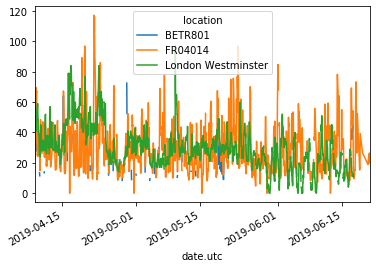

In [20]:
air_long=air_long[air_long['parameter']=='no2']
air_long.pivot(columns='location',values='value').plot()

In [21]:
#pivot for pure restructuring
#pivot_table supports aggregation
soho.pivot_table(values='rent',index='bedrooms',columns='has_gym',aggfunc='mean',margins=True)

has_gym,0,1,All
bedrooms,,,
0.0,4150.000000,4500.000000,4237.500000
1.0,5742.437500,5633.333333,5725.210526
2.0,9182.368421,9429.000000,9233.750000
3.0,11081.666667,20000.000000,12355.714286
4.0,13265.000000,NaN,13265.000000
All,8193.170213,8854.500000,8309.192982


In [22]:
air_pivoted=air_long.pivot(columns='location',values='value').reset_index()
air_pivoted.head()

location,date.utc,BETR801,FR04014,London Westminster
0,2019-04-09 01:00:00+00:00,22.5,24.4,NaN
1,2019-04-09 02:00:00+00:00,53.5,27.4,67.0
2,2019-04-09 03:00:00+00:00,54.5,34.2,67.0
3,2019-04-09 04:00:00+00:00,34.5,48.5,41.0
4,2019-04-09 05:00:00+00:00,46.5,59.5,41.0


In [23]:
#opposite of pivot is melt -> to single column
air_melted=air_pivoted.melt(id_vars='date.utc')
air_melted.head()
#more option possible
#air_melted=air_pivoted.melt(id_vars='date.utc',value_vars=["BETR801", "FR04014", "London Westminster"], value_name='NO_2',var_name='id_location')

,date.utc,location,value
0,2019-04-09 01:00:00+00:00,BETR801,22.5
1,2019-04-09 02:00:00+00:00,BETR801,53.5
2,2019-04-09 03:00:00+00:00,BETR801,54.5
3,2019-04-09 04:00:00+00:00,BETR801,34.5
4,2019-04-09 05:00:00+00:00,BETR801,46.5


##### Combining tables

In [24]:
air_no2=pd.read_csv('air_quality_no2_long.csv',parse_dates=True)
air_no2 = air_no2[["date.utc", "location", "parameter", "value"]]
air_pm25=pd.read_csv('air_quality_pm25_long.csv',parse_dates=True)
air_pm25 = air_pm25[["date.utc", "location", "parameter", "value"]]

In [25]:
#Concatenation
air_qual=pd.concat([air_pm25,air_no2],axis=0)
air_qual.head()
air_qual=air_qual.sort_values(by='date.utc')
air_qual.head() 

,date.utc,location,parameter,value
2067,2019-05-07 01:00:00+00:00,London Westminster,no2,23.0
1003,2019-05-07 01:00:00+00:00,FR04014,no2,25.0
100,2019-05-07 01:00:00+00:00,BETR801,pm25,12.5
1098,2019-05-07 01:00:00+00:00,BETR801,no2,50.5
1109,2019-05-07 01:00:00+00:00,London Westminster,pm25,8.0


In [26]:
#Now let's add additional row index -> keys
air_qual=pd.concat([air_pm25,air_no2],keys=['PM25','NO2'])
air_qual.head()

date.utc location parameter  value
PM25 0  2019-06-18 06:00:00+00:00  BETR801      pm25   18.0
     1  2019-06-17 08:00:00+00:00  BETR801      pm25    6.5
     2  2019-06-17 07:00:00+00:00  BETR801      pm25   18.5
     3  2019-06-17 06:00:00+00:00  BETR801      pm25   16.0
     4  2019-06-17 05:00:00+00:00  BETR801      pm25    7.5

In [27]:
#Join table on common key 
left = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2", "K3"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)


right = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2", "K3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }
)

result = pd.merge(left, right,how='left', on="key")
result.head()
#if the key's names are different on two tables
# use left_on and right_on

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


##### Time series data

In [34]:
air_no2=air_no2.rename(columns={'date.utc':'datetime'})
air_no2['datetime']=pd.to_datetime(air_no2['datetime'])
air_no2.head()

,datetime,location,parameter,value
0,2019-06-21 00:00:00+00:00,FR04014,no2,20.0
1,2019-06-20 23:00:00+00:00,FR04014,no2,21.8
2,2019-06-20 22:00:00+00:00,FR04014,no2,26.5
3,2019-06-20 21:00:00+00:00,FR04014,no2,24.9
4,2019-06-20 20:00:00+00:00,FR04014,no2,21.4


In [36]:
air_no2['datetime'].min(),air_no2['datetime'].max()
#pandas.Timedelta object
air_no2['datetime'].max()-air_no2['datetime'].min()

Timedelta('44 days 23:00:00')

In [38]:
#dt accessor ->month, year, weekofyear, quarter...

air_no2['month']=air_no2['datetime'].dt.month
air_no2.head()

,datetime,location,parameter,value,month
0,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,6
1,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,6
2,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,6
3,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,6
4,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,6


In [42]:
air_no2.groupby([air_no2['datetime'].dt.weekday,'location'])['value'].mean()

datetime  location          
0         BETR801               27.875000
          FR04014               24.856250
          London Westminster    23.969697
1         BETR801               22.214286
          FR04014               30.999359
          London Westminster    24.885714
2         BETR801               21.125000
          FR04014               29.165753
          London Westminster    23.460432
3         BETR801               27.500000
          FR04014               28.600690
          London Westminster    24.780142
4         BETR801               28.400000
          FR04014               31.617986
          London Westminster    26.446809
5         BETR801               33.500000
          FR04014               25.266154
          London Westminster    24.977612
6         BETR801               21.896552
          FR04014               23.274306
          London Westminster    24.859155
Name: value, dtype: float64

Text(0, 0.5, '$NO_2 (microgram/m^3)$')

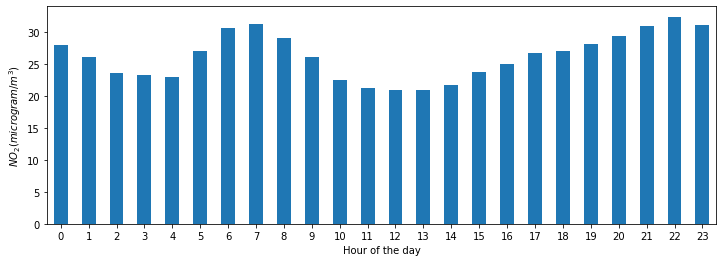

In [47]:
fig, axs=plt.subplots(figsize=(12,4))
air_no2.groupby([air_no2['datetime'].dt.hour])['value'].mean().plot(kind='bar',rot=0,ax=axs)
plt.xlabel('Hour of the day')
plt.ylabel('$NO_2 (microgram/m^3)$')

In [49]:
#Datetime as index
no_2=air_no2.pivot(index='datetime',columns='location',values='value')
no_2.head()

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-07 01:00:00+00:00,50.5,25.0,23.0
2019-05-07 02:00:00+00:00,45.0,27.7,19.0
2019-05-07 03:00:00+00:00,NaN,50.4,19.0
2019-05-07 04:00:00+00:00,NaN,61.9,16.0
2019-05-07 05:00:00+00:00,NaN,72.4,NaN


In [50]:
no_2.index.year, no_2.index.weekday

(Int64Index([2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
             ...
             2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
            dtype='int64', name='datetime', length=1033),
 Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
             ...
             3, 3, 3, 3, 3, 3, 3, 3, 3, 4],
            dtype='int64', name='datetime', length=1033))

C:\Users\main\Anaconda\lib\site-packages\pandas\core\arrays\datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


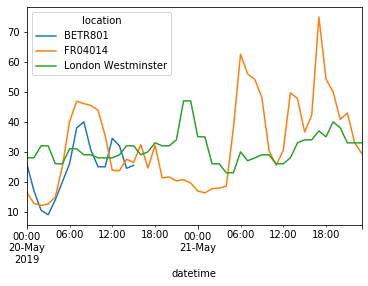

In [52]:
no_2['2019-05-20':'2019-05-21'].plot()

In [54]:
#Resampling 
monthly_max=no_2.resample('M').max()
#time based grouping M, 5H ... target frequency
monthly_max

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-31 00:00:00+00:00,74.5,97.0,97.0
2019-06-30 00:00:00+00:00,52.5,84.7,52.0


C:\Users\main\Anaconda\lib\site-packages\pandas\core\arrays\datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


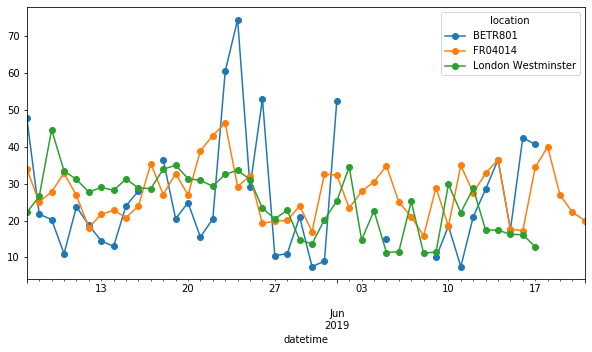

In [56]:
no_2.resample('D').mean().plot(style='-o',figsize=(10,5))

##### Textual data

In [62]:
#like dt accessor in time series,
#str accessor is used here
manhat['neighborhood'].str.lower()
manhat['neighborhood'].str.split(' ')
manhat['first_name']=manhat['neighborhood'].str.split(' ').str.get(0)
manhat['first_name']

0           Not
1           Not
2           Not
3           Not
4           Not
         ...   
3534    Chelsea
3535    Tribeca
3536     Little
3537    Midtown
3538    Tribeca
Name: first_name, Length: 3539, dtype: object

In [65]:
manhat[manhat['neighborhood'].str.contains('Mid')]

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough,later_name,first_name
11,8293,6920,3.0,2,1439,7,9.0,39,1,0,0,0,0,0,0,0,Midtown East,Manhattan,Midtown,Midtown
13,2964,4850,1.0,1,789,2,40.0,11,0,0,0,0,0,0,0,0,Midtown West,Manhattan,Midtown,Midtown
18,476,9000,2.0,2,1749,4,15.0,10,0,0,0,1,0,0,0,0,Midtown East,Manhattan,Midtown,Midtown
19,3491,4950,1.0,1,870,2,9.0,11,0,1,1,0,0,1,0,0,Midtown,Manhattan,Midtown,Midtown
25,9535,4990,1.0,1,823,5,22.0,44,1,0,0,0,0,0,0,0,Midtown East,Manhattan,Midtown,Midtown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3520,1985,3125,0.0,1,625,1,3.0,19,1,0,0,0,0,0,0,0,Midtown West,Manhattan,Midtown,Midtown
3523,8195,7150,2.0,2,1221,3,27.0,11,0,0,0,0,0,0,0,0,Midtown South,Manhattan,Midtown,Midtown
3526,10787,3800,1.0,1,615,2,25.0,9,0,0,0,0,0,0,0,0,Midtown West,Manhattan,Midtown,Midtown
3527,3365,4500,1.0,1,963,10,49.0,27,1,0,0,0,0,0,0,0,Midtown East,Manhattan,Midtown,Midtown


In [69]:
manhat.loc[manhat['neighborhood'].str.len().idxmax(),'neighborhood']

'Stuyvesant Town/PCV'

In [75]:
manhat['neighborhood_short']=manhat['neighborhood'].replace({'Upper West Side':'UW','Upper East Side':'UE'})
manhat['neighborhood_short'].value_counts()

UW                     579
UE                     498
Midtown East           459
Midtown West           314
Financial District     268
Chelsea                182
Flatiron               131
Tribeca                119
Midtown                118
East Village           108
Battery Park City      103
Midtown South           85
Central Harlem          81
West Village            67
Greenwich Village       64
Gramercy Park           61
Soho                    57
Washington Heights      54
Lower East Side         41
East Harlem             41
Central Park South      23
Hamilton Heights        16
Morningside Heights     13
Inwood                  12
Not known               10
Nolita                   9
Chinatown                8
Roosevelt Island         5
Long Island City         4
Little Italy             3
Stuyvesant Town/PCV      3
West Harlem              2
Manhattanville           1
Name: neighborhood_short, dtype: int64